In [5]:
from google.colab import drive
drive.mount('/content/drive')

import os
import sys

GITHUB_REPO = "https://github.com/danokundaye/kidney-tumour-detection.git"
REPO_NAME = "kidney-tumour-detection"
CLONE_PATH = f"/content/{REPO_NAME}"

if os.path.exists(CLONE_PATH):
    print("Repository already exists, pulling latest changes...")
    os.chdir(CLONE_PATH)
    os.system("git pull origin main")
    print("Repository updated")
else:
    print("Cloning repository...")
    os.system(f"git clone {GITHUB_REPO} {CLONE_PATH}")
    print("Repository cloned")

if CLONE_PATH not in sys.path:
    sys.path.insert(0, CLONE_PATH)
    print(f"Added {CLONE_PATH} to Python path")

print(f"\nWorking directory: {CLONE_PATH}")
print("GitHub sync complete")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Repository already exists, pulling latest changes...
Repository updated

Working directory: /content/kidney-tumour-detection
GitHub sync complete


In [2]:
import subprocess
subprocess.run(["pip", "install", "ultralytics", "--quiet"], check = True)
print("Dependencies installed")

Dependencies installed


In [7]:
import os
os.chdir("/content/kidney-tumour-detection")
!git pull origin main

!python src/detection/yolo_train.py

From https://github.com/danokundaye/kidney-tumour-detection
 * branch            main       -> FETCH_HEAD
Already up to date.
YOLO Retrain
Key change from Phase 5: NO large-slice filter
All positive kidney slices included in training
Original train paths : 51484
Original val paths   : 5120

Filtering training set...
  Positive slices    : 18795
  Background slices  : 32689
  Filtered train set : 37590 images
  Ratio              : 1:1 positive:background

Filtering validation set...
  Positive slices    : 1856
  Background slices  : 3264
  Filtered val set   : 3712 images

Written: /content/drive/MyDrive/kidney-tumour-detection/dataset/processed/retrain_dataset/retrain_train.txt
Written: /content/drive/MyDrive/kidney-tumour-detection/dataset/processed/retrain_dataset/retrain_val.txt
Written: /content/drive/MyDrive/kidney-tumour-detection/dataset/processed/retrain_dataset/retrain_data.yaml

Starting training...
  Data yaml    : /content/drive/MyDrive/kidney-tumour-detection/dataset/proc

In [8]:
import random
from pathlib import Path
from ultralytics import YOLO

model_path = "/content/drive/MyDrive/kidney-tumour-detection/results/phase5_yolo_retrain/yolov8s_retrain_run1/weights/best.pt"
slices_dir = Path("/content/drive/MyDrive/kidney-tumour-detection/dataset/processed/slices/segmentation_train")

model = YOLO(model_path)

# Collect all slice paths from segmentation_train
all_slices = sorted(slices_dir.rglob("images/*.png"))
print(f"Total slices found: {len(all_slices)}")

# Sample 500 random slices for a quick representative check
sample = random.sample(all_slices, min(500, len(all_slices)))

detected = 0
for path in sample:
    results = model.predict(str(path), conf=0.10, verbose=False)
    if len(results[0].boxes) > 0:
        detected += 1

print(f"\nSample size      : {len(sample)}")
print(f"Detected         : {detected}")
print(f"Detection rate   : {detected/len(sample)*100:.1f}%")

Total slices found: 23342

Sample size      : 500
Detected         : 360
Detection rate   : 72.0%


In [9]:
import shutil
from pathlib import Path

unet_boxes_dir = Path("/content/drive/MyDrive/kidney-tumour-detection/dataset/processed/unet_boxes")
if unet_boxes_dir.exists():
    shutil.rmtree(unet_boxes_dir)
    print("Cleared old inference results")
else:
    print("Nothing to clear")

Cleared old inference results


In [ ]:
import subprocess
subprocess.run(["pip", "install", "ultralytics", "--quiet"], check=True)

print("Dependencies installed")

Dependencies installed


In [13]:
from pathlib import Path

model_path = Path("/content/drive/MyDrive/kidney-tumour-detection/results/phase5_yolo_retrain/yolov8s_retrain_run1/weights/best.pt")
print(f"Model exists : {model_path.exists()}")
print(f"Model size   : {model_path.stat().st_size / 1e6:.1f} MB")

Model exists : True
Model size   : 22.5 MB


In [15]:
import os
os.chdir("/content/kidney-tumour-detection")
!git pull origin main

!python src/segmentation/yolo_inference_for_unet.py

From https://github.com/danokundaye/kidney-tumour-detection
 * branch            main       -> FETCH_HEAD
Already up to date.
 Step 6.1 — YOLO Inference
Loading model from: /content/drive/MyDrive/kidney-tumour-detection/results/phase5_yolo_retrain/yolov8s_retrain_run1/weights/best.pt
Cases to process : 120
Conf threshold   : 0.1
Margin           : 20%
Output dir       : /content/drive/MyDrive/kidney-tumour-detection/dataset/processed/unet_boxes

Running YOLO inference...: 100% 120/120 [14:51<00:00,  7.43s/it]
Inference Summary
  Total slices         : 23342
  Detected slices      : 17178
  Detection rate       : 73.6%
  Cases with 0 detects : 1

  Cases with no detections:
    case_00152

JSON files saved to: /content/drive/MyDrive/kidney-tumour-detection/dataset/processed/unet_boxes


In [3]:
import subprocess
result = subprocess.run(
    ["du", "-sh", "/content/drive/MyDrive/kidney-tumour-detection/dataset/processed/slices/segmentation_train"],
    capture_output=True, text=True
)
print(result.stdout)

862M	/content/drive/MyDrive/kidney-tumour-detection/dataset/processed/slices/segmentation_train



In [13]:
import os
os.chdir("/content/kidney-tumour-detection")
!git pull origin main

!python src/segmentation/unet_crop_preparation.py

From https://github.com/danokundaye/kidney-tumour-detection
 * branch            main       -> FETCH_HEAD
Already up to date.

 U-Net Crop Preparation
Total cases      : 120
Fallback case    : case_00152
Local output     : /content/local_data/unet_crops
Drive output     : /content/drive/MyDrive/kidney-tumour-detection/dataset/processed/unet_crops
U-Net input size : 256x256


Local source data already exists, skipping copy.
Preparing U-Net crops: 100% 120/120 [02:14<00:00,  1.12s/it]

Syncing crops to Drive...
    210,594,317 100%  227.04kB/s    0:15:05 (xfr#52146, to-chk=0/52627)
Sync complete.

 U-Net Preparation Complete
  Cases processed    : 120
  Total crops saved  : 17382
  Skipped slices     : 5960

  Region type breakdown:
    tumour_only      : 819
    cyst_only        : 413
    both             : 155
    none (healthy)   : 15995

  Crops saved to     : /content/drive/MyDrive/kidney-tumour-detection/dataset/processed/unet_crops


In [23]:
from pathlib import Path
p = Path("/content/drive/MyDrive/kidney-tumour-detection/dataset/kits.json")
print(p.exists())

True


In [48]:
import os
os.chdir("/content/kidney-tumour-detection")
!git pull origin main

!python src/segmentation/unet_split.py

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0 (from 0)
Unpacking objects: 100% (5/5), 429 bytes | 429.00 KiB/s, done.
From https://github.com/danokundaye/kidney-tumour-detection
 * branch            main       -> FETCH_HEAD
   4e66f49..2bb9684  main       -> origin/main
Updating 4e66f49..2bb9684
Fast-forward
 src/segmentation/unet_split.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)
Step 6.3 — U-Net Data Splitting
Segmentation train cases : 120

Analysing region types per case...

Abnormality distribution (120 cases):
abnormality
healthy    87
tumour     30
cyst        3

Split result:
  Train : 96 cases
  Val   : 24 cases

Train abnormality distribution:
abnormality
healthy    70
tumour     24
cyst        2

Val abnormality distribution:
abnormality
healthy    17
tumour      6
cyst        1

Saved:
  /content/drive/MyDrive/kidney-tum

In [32]:
import os
from pathlib import Path

local_crops = Path("/content/local_data/unet_crops")
drive_crops = Path("/content/drive/MyDrive/kidney-tumour-detection/dataset/processed/unet_crops")

# Find incomplete cases
incomplete = []
for case_dir in sorted(drive_crops.iterdir()):
    local_count = len(list((local_crops / case_dir.name / "images").glob("*.png")))
    drive_count = len(list((drive_crops / case_dir.name / "images").glob("*.png")))
    if local_count < drive_count:
        incomplete.append(case_dir.name)

print(f"Cases to sync: {len(incomplete)}")

# Rsync only incomplete cases one at a time
for i, case_id in enumerate(incomplete):
    src = str(drive_crops / case_id) + "/"
    dst = str(local_crops / case_id) + "/"
    os.system(f"rsync -a '{src}' '{dst}'")
    print(f"  {i+1}/{len(incomplete)}: {case_id} done")

print("All cases synced")

Cases to sync: 77
  1/77: case_00126 done
  2/77: case_00128 done
  3/77: case_00129 done
  4/77: case_00131 done
  5/77: case_00132 done
  6/77: case_00134 done
  7/77: case_00135 done
  8/77: case_00136 done
  9/77: case_00137 done
  10/77: case_00138 done
  11/77: case_00139 done
  12/77: case_00140 done
  13/77: case_00144 done
  14/77: case_00148 done
  15/77: case_00149 done
  16/77: case_00152 done
  17/77: case_00156 done
  18/77: case_00158 done
  19/77: case_00161 done
  20/77: case_00163 done
  21/77: case_00166 done
  22/77: case_00167 done
  23/77: case_00170 done
  24/77: case_00171 done
  25/77: case_00172 done
  26/77: case_00174 done
  27/77: case_00177 done
  28/77: case_00180 done
  29/77: case_00182 done
  30/77: case_00187 done
  31/77: case_00188 done
  32/77: case_00191 done
  33/77: case_00192 done
  34/77: case_00194 done
  35/77: case_00195 done
  36/77: case_00196 done
  37/77: case_00199 done
  38/77: case_00200 done
  39/77: case_00205 done
  40/77: case_00

In [33]:
import os

print("Zipping locally...")
os.system("cd /content/local_data && zip -r unet_crops.zip unet_crops/")

print("Copying zip to Drive...")
os.system("cp /content/local_data/unet_crops.zip '/content/drive/MyDrive/kidney-tumour-detection/dataset/processed/unet_crops.zip'")

print("ALL DONE — zip saved to Drive for future sessions")

Zipping locally...
Copying zip to Drive...
ALL DONE — zip saved to Drive for future sessions


In [51]:
# Mount google colab drive
from google.colab import drive
drive.mount('/content/drive')

# Pull new changes
import os
os.chdir('/content/kidney-tumour-detection')
!git pull origin main

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0 (from 0)
Unpacking objects: 100% (5/5), 619 bytes | 619.00 KiB/s, done.
From https://github.com/danokundaye/kidney-tumour-detection
 * branch            main       -> FETCH_HEAD
   2bb9684..45c8052  main       -> origin/main
Updating 2bb9684..45c8052
Fast-forward
 src/segmentation/unet_train.py | 49 ++++++++++++++++++++----------------------
 1 file changed, 23 insertions(+), 26 deletions(-)


In [52]:
!python src/segmentation/unet_train.py

Step 6.4 — U-Net Segmentation Training

Local crops already exist, skipping extraction.
Device           : cuda

Train cases      : 96
Val cases        : 24

Building train dataset:
  Abnormal slices  : 3368
  Healthy slices   : 6736 (sampled from 10720)
  Total slices     : 10104

Building val dataset:
  Abnormal slices  : 1031
  Healthy slices   : 2062 (sampled from 2263)
  Total slices     : 3093

Starting training...
Max epochs       : 150
Patience         : 30
Batch size       : 16
Learning rate    : 0.0001
Results dir      : /content/drive/MyDrive/kidney-tumour-detection/results/phase6_unet

Epoch   1/150 | Train Loss: 1.1830  Dice: 0.0233 | Val Loss: 1.0551  Dice: 0.1753  IoU: 0.1753 | LR: 0.000100
 New best model saved (Val Dice: 0.1753)
Epoch   2/150 | Train Loss: 1.0129  Dice: 0.1106 | Val Loss: 0.9527  Dice: 0.1987  IoU: 0.1375 | LR: 0.000100
 New best model saved (Val Dice: 0.1987)
Epoch   3/150 | Train Loss: 0.9166  Dice: 0.1555 | Val Loss: 0.9167  Dice: 0.1960  IoU: 0.139

In [40]:
# Fix local mismatch between images and masks
import os

os.system("rsync -a '/content/drive/MyDrive/kidney-tumour-detection/dataset/processed/unet_crops/case_00125/' '/content/local_data/unet_crops/case_00125/'")
print("Done")

from pathlib import Path
local = Path("/content/local_data/unet_crops/case_00125")
print("images:", len(list((local/"images").glob("*.png"))))
print("masks :", len(list((local/"masks").glob("*.png"))))

Done
images: 146
masks : 146


In [49]:
import pandas as pd
import os
from pathlib import Path

splits_dir  = Path("/content/drive/MyDrive/kidney-tumour-detection/dataset/processed/splits")
local_crops = Path("/content/local_data/unet_crops")

train_df = pd.read_csv(splits_dir / "unet_train.csv")
val_df   = pd.read_csv(splits_dir / "unet_val.csv")
all_df   = pd.concat([train_df, val_df])

abnormality_lookup = dict(zip(all_df['case_id'], all_df['abnormality']))

rows = []
for case_id, abnormality in abnormality_lookup.items():
    images_dir = local_crops / case_id / "images"
    try:
        filenames = os.listdir(str(images_dir))
        for fname in sorted(filenames):
            if fname.endswith('.png'):
                rows.append(f"{case_id},{fname},{abnormality}")
    except:
        continue

index_path = splits_dir / "unet_crops_index.csv"
with open(index_path, 'w') as f:
    f.write("case_id,slice_name,region_type\n")
    f.write("\n".join(rows))

print(f"Index rebuilt  : {index_path}")
print(f"Total entries  : {len(rows)}")

Index rebuilt  : /content/drive/MyDrive/kidney-tumour-detection/dataset/processed/splits/unet_crops_index.csv
Total entries  : 17382


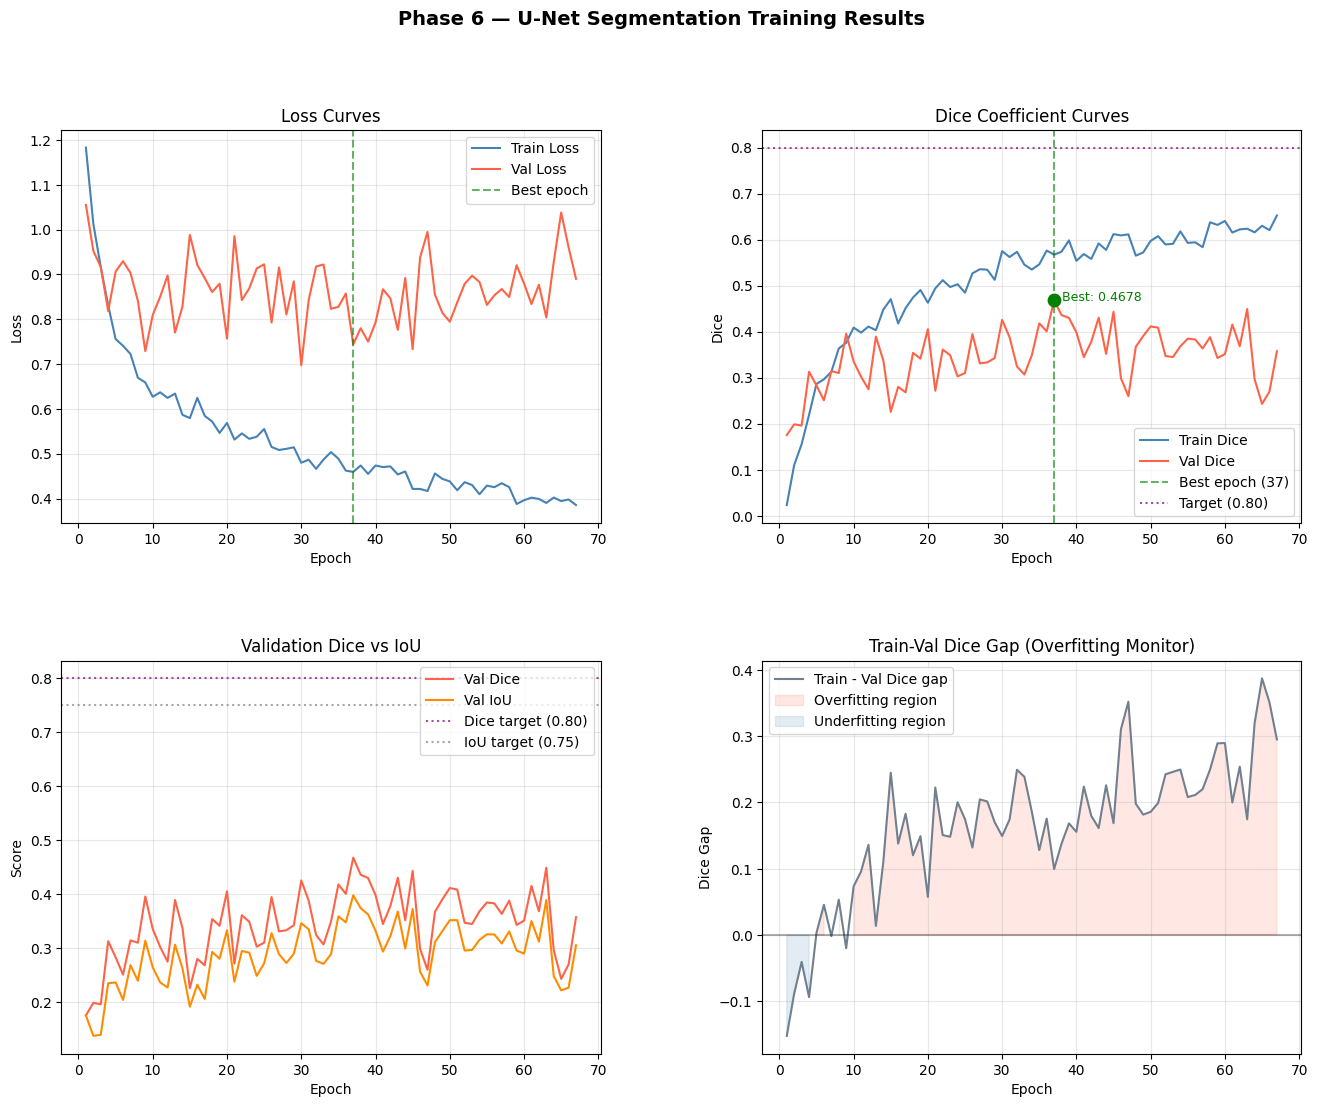


Saved: /content/drive/MyDrive/kidney-tumour-detection/results/phase6_unet/training_curves.png

Summary:
  Total epochs      : 67
  Best Val Dice     : 0.4678 at epoch 37
  Best Val IoU      : 0.3980
  Final Train Dice  : 0.6525
  Final Train-Val gap: 0.2949
  Final Train-Val gap: 0.2949


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

metrics_path = "/content/drive/MyDrive/kidney-tumour-detection/results/phase6_unet/metrics.csv"
df = pd.read_csv(metrics_path)

fig = plt.figure(figsize=(16, 12))
fig.suptitle("Phase 6 — U-Net Segmentation Training Results", fontsize=14, fontweight='bold', y=0.98)
gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.35, wspace=0.3)

# --- Plot 1: Loss curves ---
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(df['epoch'], df['train_loss'], label='Train Loss', color='steelblue', linewidth=1.5)
ax1.plot(df['epoch'], df['val_loss'],   label='Val Loss',   color='tomato',    linewidth=1.5)
ax1.axvline(x=df.loc[df['val_dice'].idxmax(), 'epoch'], color='green', linestyle='--', alpha=0.6, label='Best epoch')
ax1.set_title('Loss Curves')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- Plot 2: Dice curves ---
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(df['epoch'], df['train_dice'], label='Train Dice', color='steelblue', linewidth=1.5)
ax2.plot(df['epoch'], df['val_dice'],   label='Val Dice',   color='tomato',    linewidth=1.5)
best_epoch = df.loc[df['val_dice'].idxmax(), 'epoch']
best_dice  = df['val_dice'].max()
ax2.axvline(x=best_epoch, color='green', linestyle='--', alpha=0.6, label=f'Best epoch ({best_epoch})')
ax2.axhline(y=0.80, color='purple', linestyle=':', alpha=0.7, label='Target (0.80)')
ax2.scatter(best_epoch, best_dice, color='green', zorder=5, s=80)
ax2.annotate(f'  Best: {best_dice:.4f}', xy=(best_epoch, best_dice), fontsize=9, color='green')
ax2.set_title('Dice Coefficient Curves')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Dice')
ax2.legend()
ax2.grid(True, alpha=0.3)

# --- Plot 3: Val Dice vs Val IoU ---
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(df['epoch'], df['val_dice'], label='Val Dice', color='tomato',    linewidth=1.5)
ax3.plot(df['epoch'], df['val_iou'],  label='Val IoU',  color='darkorange', linewidth=1.5)
ax3.axhline(y=0.80, color='purple', linestyle=':', alpha=0.7, label='Dice target (0.80)')
ax3.axhline(y=0.75, color='gray',   linestyle=':', alpha=0.7, label='IoU target (0.75)')
ax3.set_title('Validation Dice vs IoU')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Score')
ax3.legend()
ax3.grid(True, alpha=0.3)

# --- Plot 4: Train-Val Dice gap (overfitting monitor) ---
ax4 = fig.add_subplot(gs[1, 1])
gap = df['train_dice'] - df['val_dice']
ax4.plot(df['epoch'], gap, color='slategray', linewidth=1.5, label='Train - Val Dice gap')
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax4.fill_between(df['epoch'], gap, 0, where=(gap > 0), alpha=0.15, color='tomato',    label='Overfitting region')
ax4.fill_between(df['epoch'], gap, 0, where=(gap < 0), alpha=0.15, color='steelblue', label='Underfitting region')
ax4.set_title('Train-Val Dice Gap (Overfitting Monitor)')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Dice Gap')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Save to Drive
output_path = "/content/drive/MyDrive/kidney-tumour-detection/results/phase6_unet/training_curves.png"
plt.savefig(output_path, dpi=150, bbox_inches='tight')
plt.show()

print(f"\nSaved: {output_path}")
print(f"\nSummary:")
print(f"  Total epochs      : {df['epoch'].max()}")
print(f"  Best Val Dice     : {best_dice:.4f} at epoch {best_epoch}")
print(f"  Best Val IoU      : {df.loc[df['val_dice'].idxmax(), 'val_iou']:.4f}")
print(f"  Final Train Dice  : {df['train_dice'].iloc[-1]:.4f}")
print(f"  Final Train-Val gap: {gap.iloc[-1]:.4f}")


print(f"  Final Train-Val gap: {gap.iloc[-1]:.4f}")

# Top left    : Train vs Val loss — shows overall learning progress
# Top right   : Train vs Val Dice — shows Dice improvement with best epoch marked and 0.80 target line
# Bottom left : Val Dice vs Val IoU — shows both segmentation metrics against their targets
# Bottom right: Train-Val gap — directly visualises overfitting with shaded regions

Truly abnormal slices: 1387
Visualising 12 abnormal slices


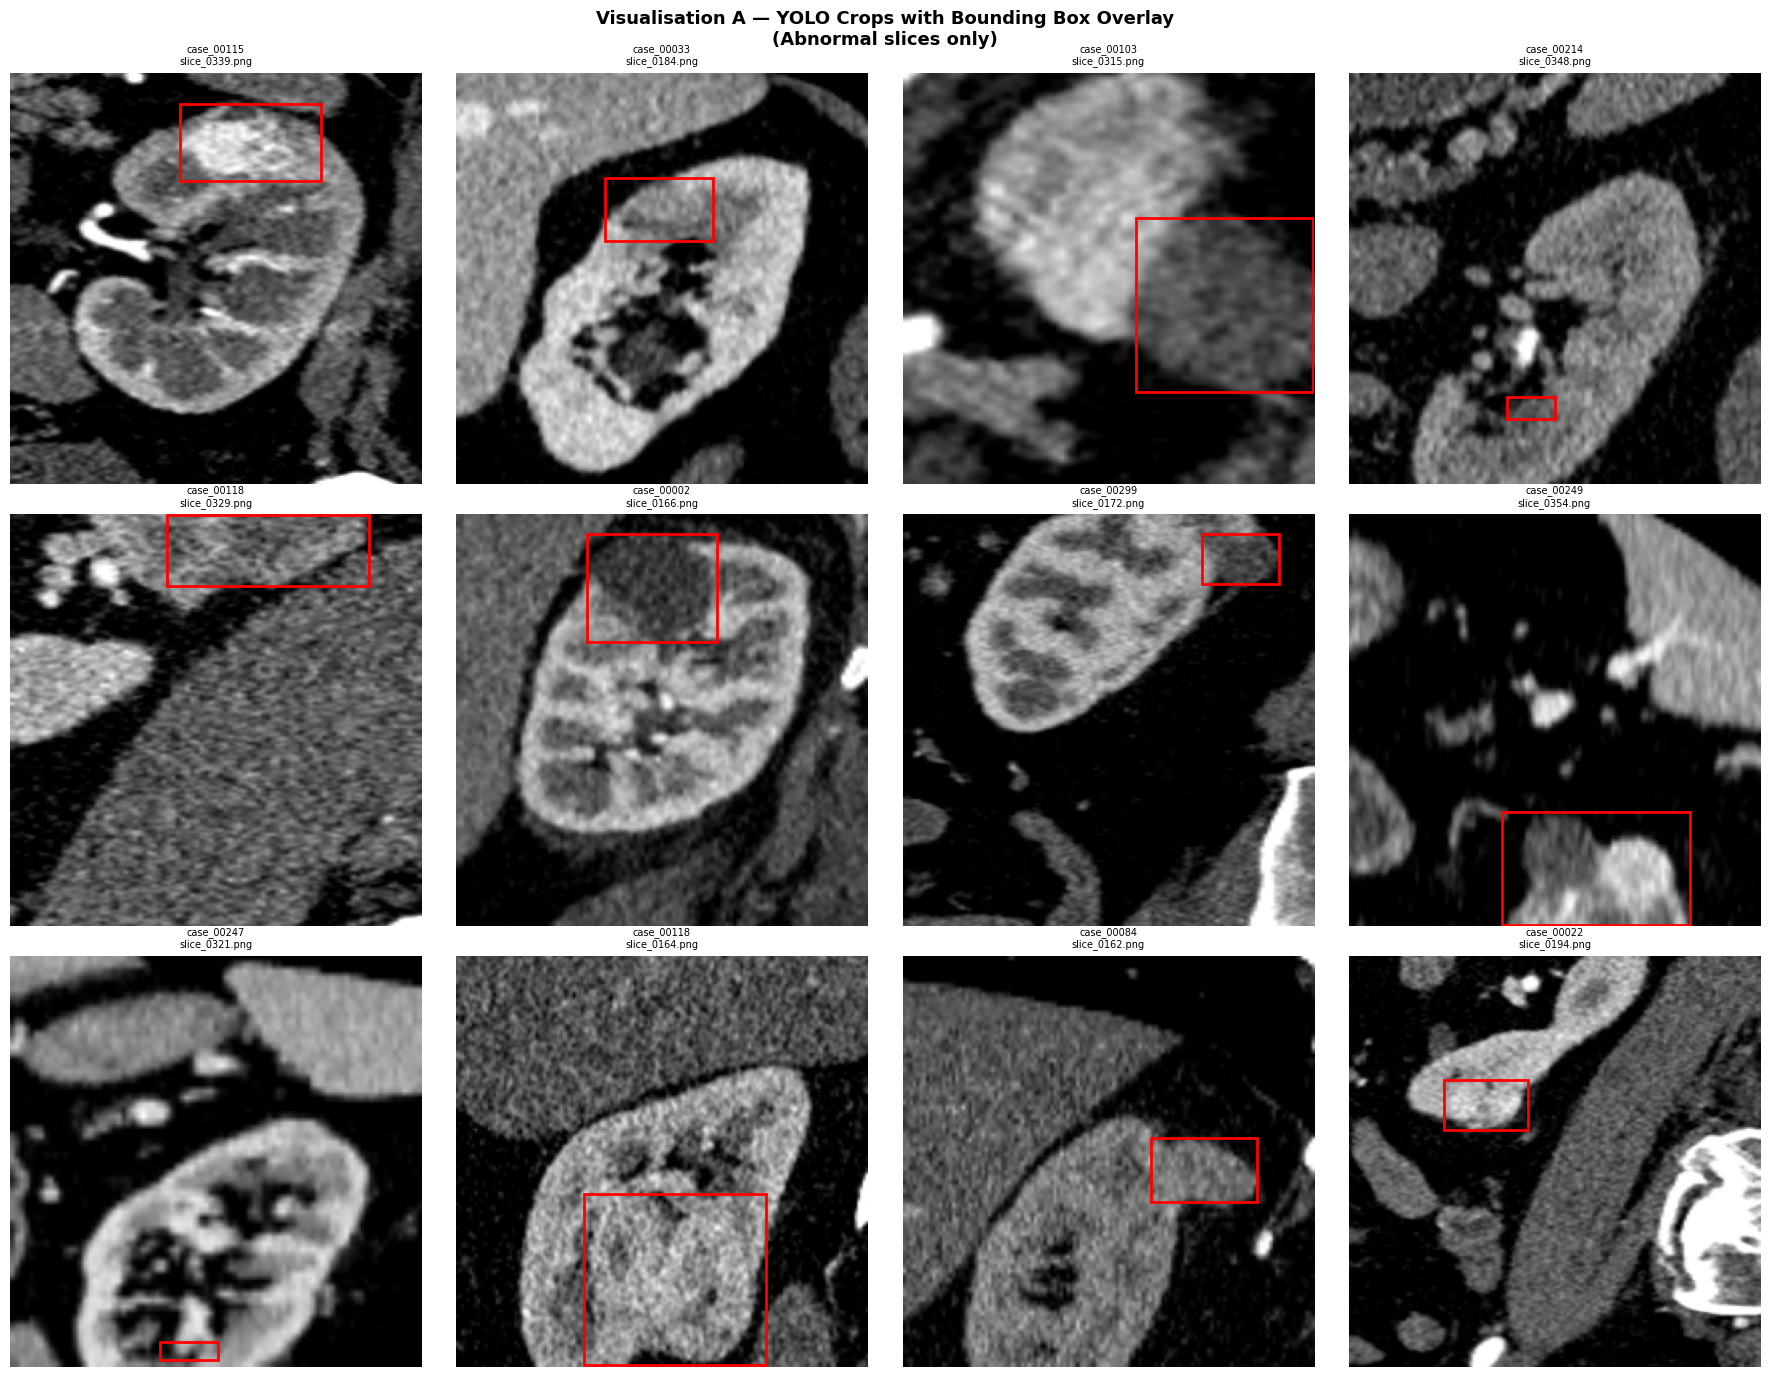

Saved: /content/drive/MyDrive/kidney-tumour-detection/results/phase6_unet/vis_a_bounding_boxes.png


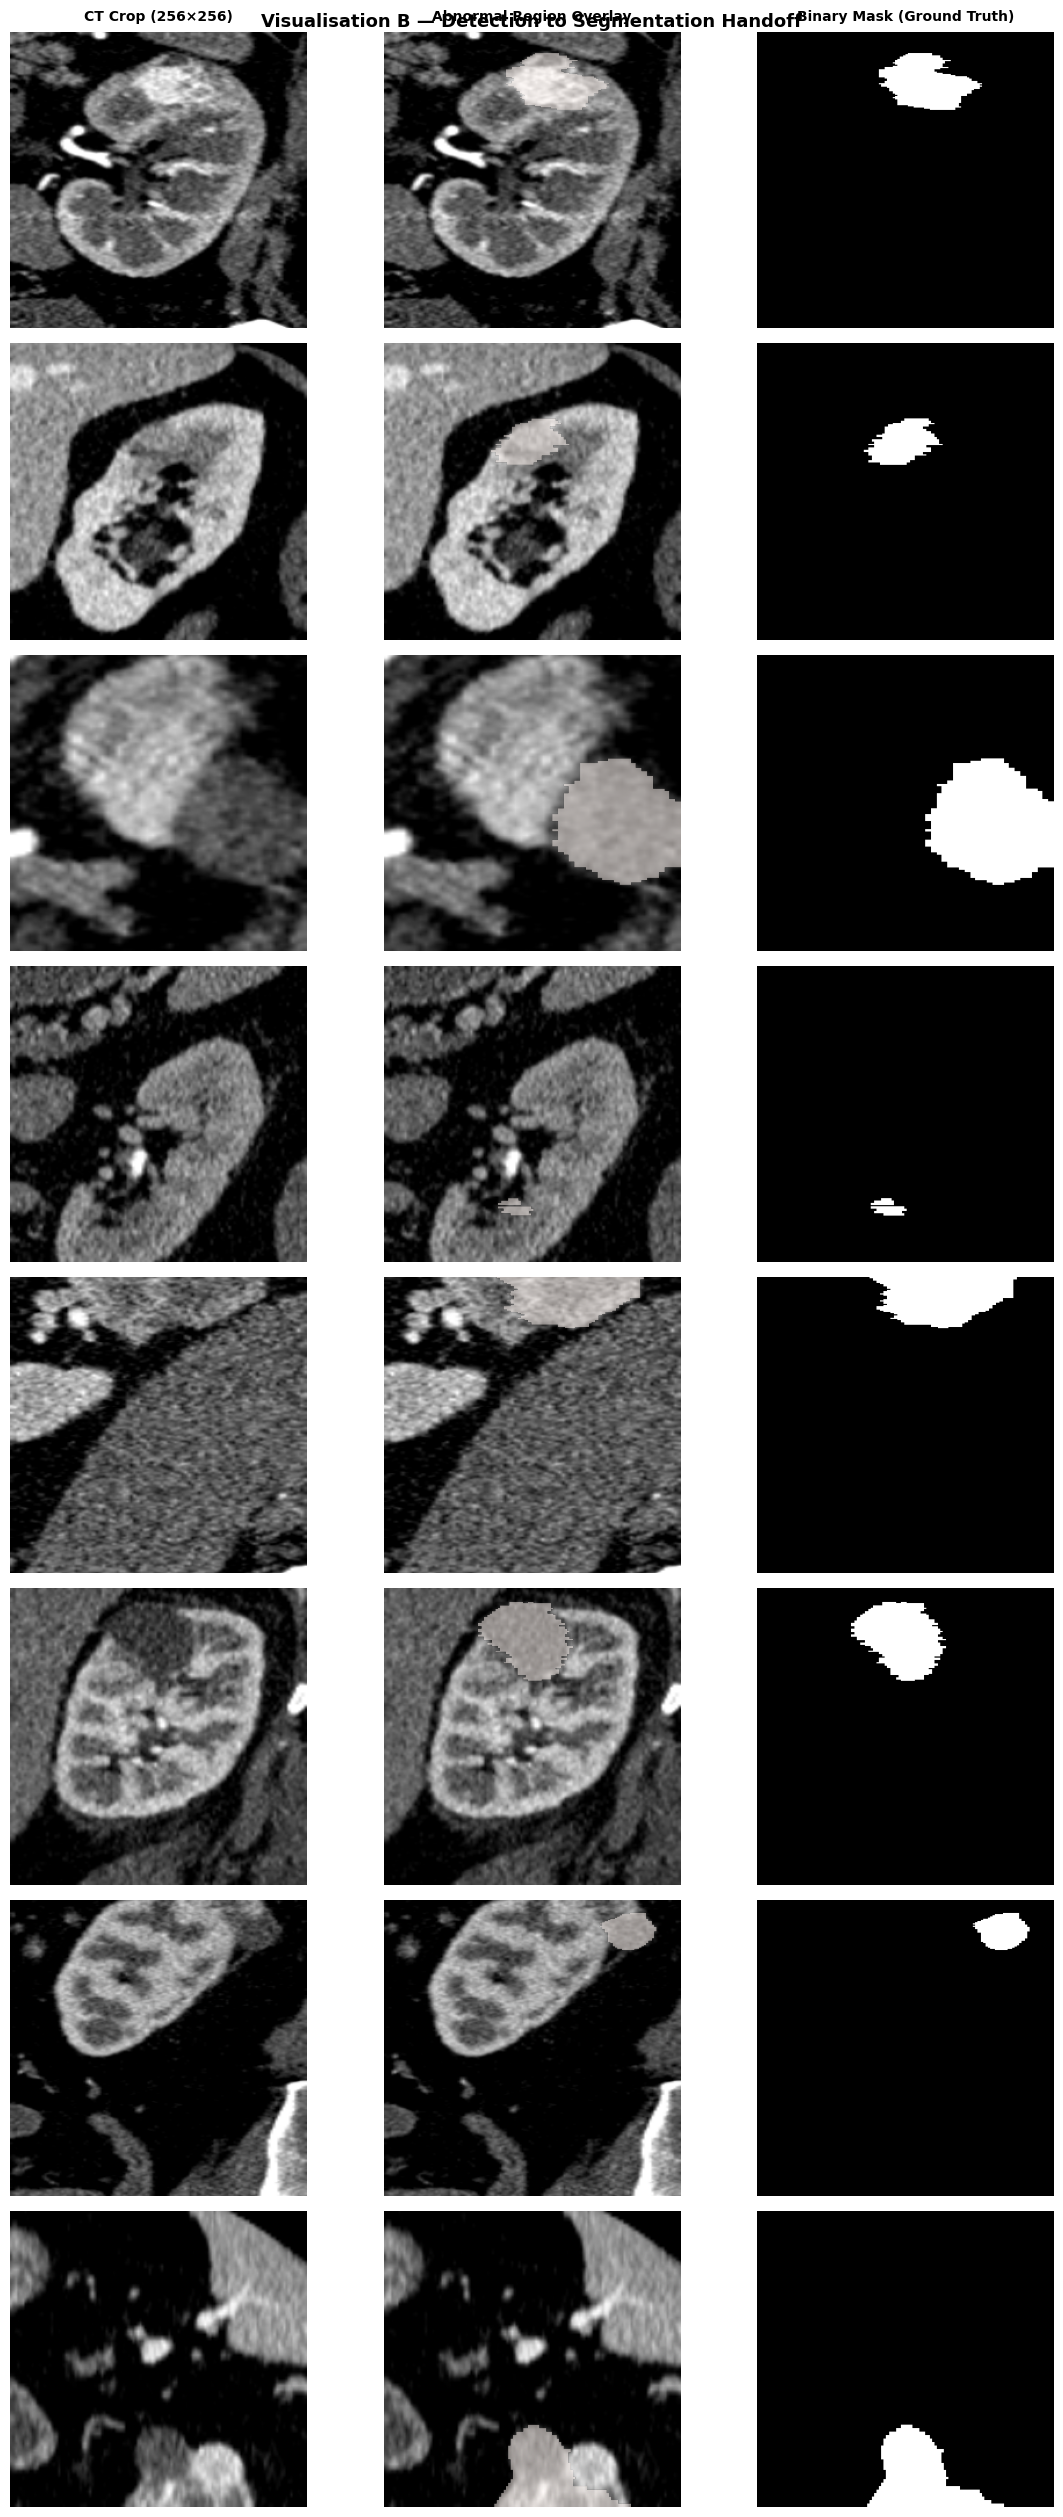

Saved: /content/drive/MyDrive/kidney-tumour-detection/results/phase6_unet/vis_b_detection_segmentation_handoff.png

All visualisations saved to Drive.


In [58]:
# Generate two sets of visualisations:
#   A) Random sample of CT slices with YOLO bounding boxes overlaid
#   B) Side-by-side: original slice | YOLO crop | U-Net mask
#
# Reads from local unet_crops (already extracted) and original slices


import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pathlib import Path
from PIL import Image
import pandas as pd

# Paths
local_crops   = Path("/content/local_data/unet_crops")
splits_dir    = Path("/content/drive/MyDrive/kidney-tumour-detection/dataset/processed/splits")
results_dir   = Path("/content/drive/MyDrive/kidney-tumour-detection/results/phase6_unet")
index_df      = pd.read_csv(splits_dir / "unet_crops_index.csv")

# Filter to slices that genuinely have abnormal pixels
truly_abnormal = []
for _, row in index_df.iterrows():
    mask_path = local_crops / row['case_id'] / "masks" / row['slice_name']
    if mask_path.exists():
        mask = np.array(Image.open(mask_path))
        if np.any(mask > 127):
            truly_abnormal.append(row)

abnormal_df = pd.DataFrame(truly_abnormal)
print(f"Truly abnormal slices: {len(abnormal_df)}")

random.seed(42)
samples = abnormal_df.sample(n=min(12, len(abnormal_df)), random_state=42).to_dict('records')

print(f"Visualising {len(samples)} abnormal slices")


# Visualisation A — YOLO crops with bounding box overlay

fig, axes = plt.subplots(3, 4, figsize=(18, 14))
fig.suptitle("Visualisation A — YOLO Crops with Bounding Box Overlay\n(Abnormal slices only)",
             fontsize=13, fontweight='bold')

for i, (entry, ax) in enumerate(zip(samples, axes.flatten())):
    case_id    = entry['case_id']
    slice_name = entry['slice_name']

    img_path  = local_crops / case_id / "images" / slice_name
    mask_path = local_crops / case_id / "masks"  / slice_name

    if not img_path.exists():
        ax.axis('off')
        continue

    img  = np.array(Image.open(img_path).convert('L'))
    mask = np.array(Image.open(mask_path))

    # Find bounding box of abnormal region in mask
    rows = np.any(mask > 127, axis=1)
    cols = np.any(mask > 127, axis=0)

    ax.imshow(img, cmap='gray')

    if rows.any() and cols.any():
        rmin, rmax = np.where(rows)[0][[0, -1]]
        cmin, cmax = np.where(cols)[0][[0, -1]]
        rect = patches.Rectangle(
            (cmin, rmin), cmax - cmin, rmax - rmin,
            linewidth=2, edgecolor='red', facecolor='none', label='Abnormal region'
        )
        ax.add_patch(rect)

    ax.set_title(f"{case_id}\n{slice_name}", fontsize=7)
    ax.axis('off')

plt.tight_layout()
save_a = str(results_dir / "vis_a_bounding_boxes.png")
plt.savefig(save_a, dpi=150, bbox_inches='tight')
plt.show()
print(f"Saved: {save_a}")


# Visualisation B — Side by side: original | crop | mask

n_cols  = 3   # original | crop | mask
n_rows  = min(8, len(samples))
samples_b = samples[:n_rows]

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3.2))
fig.suptitle("Visualisation B — Detection to Segmentation Handoff",
             fontsize=13, fontweight='bold')

col_titles = ['CT Crop (256×256)', 'Abnormal Region Overlay', 'Binary Mask (Ground Truth)']
for col, title in enumerate(col_titles):
    axes[0, col].set_title(title, fontsize=10, fontweight='bold', pad=8)

for row, entry in enumerate(samples_b):
    case_id    = entry['case_id']
    slice_name = entry['slice_name']

    img_path  = local_crops / case_id / "images" / slice_name
    mask_path = local_crops / case_id / "masks"  / slice_name

    if not img_path.exists():
        for col in range(n_cols):
            axes[row, col].axis('off')
        continue

    img  = np.array(Image.open(img_path).convert('L'))
    mask = np.array(Image.open(mask_path))
    binary_mask = (mask > 127).astype(np.float32)

    # Column 0 — original CT crop
    axes[row, 0].imshow(img, cmap='gray')
    axes[row, 0].set_ylabel(f"{case_id}\n{slice_name}", fontsize=7, rotation=0,
                             labelpad=80, va='center')
    axes[row, 0].axis('off')

    # Column 1 — CT crop with abnormal region highlighted
    axes[row, 1].imshow(img, cmap='gray')
    masked = np.ma.masked_where(binary_mask == 0, binary_mask)
    axes[row, 1].imshow(masked, cmap='Reds', alpha=0.5)
    axes[row, 1].axis('off')

    # Column 2 — binary mask only
    axes[row, 2].imshow(binary_mask, cmap='gray')
    axes[row, 2].axis('off')

plt.tight_layout()
save_b = str(results_dir / "vis_b_detection_segmentation_handoff.png")
plt.savefig(save_b, dpi=150, bbox_inches='tight')
plt.show()
print(f"Saved: {save_b}")

print("\nAll visualisations saved to Drive.")